In [ ]:
# I want to create a rectangular box around a center.
# that will allow me to display the detection and tracking success in ChimeraX over time in a movie. Nice!

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook



#import cv2
import pims
from PIL import Image

import skimage

import json




[[ 0.25  0.  ]
 [ 0.    0.25]]


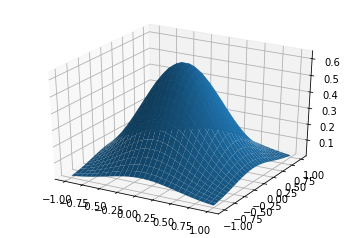

In [17]:
#https://stackoverflow.com/questions/40622203/how-to-plot-3d-gaussian-distribution-with-matplotlib


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from scipy.stats import multivariate_normal

x, y = np.mgrid[-1.0:1.0:30j, -1.0:1.0:30j]

# Need an (N, 2) array of (x, y) pairs.
xy = np.column_stack([x.flat, y.flat])

mu = np.array([0.0, 0.0])

sigma = np.array([.5, .5])
covariance = np.diag(sigma**2)
print(covariance)

z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)

# Reshape back to a (30, 30) grid.
z = z.reshape(x.shape)





fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')



ax.plot_surface(x,y,z)
#ax.plot_wireframe(x,y,z)

plt.show()

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from scipy.stats import multivariate_normal

x, y, z = np.mgrid[-1.0:1.0:30j, -1.0:1.0:30j, -1.0:1.0:30j]

# Need an (N, 2) array of (x, y) pairs.
xyz = np.column_stack([x.flat, y.flat, z.flat])

mu = np.array([0.0, 0.0,  0.0])

sigma = np.array([.5, .5, .5])
covariance = np.diag(sigma**2)
print(covariance)

a = multivariate_normal.pdf(xyz, mean=mu, cov=covariance)
#print(a)
# Reshape back to a (30, 30,30) grid.

a = a.reshape(x.shape)
#print(a)
print(np.max(1000*a))


#----

data = (1000*a).astype('uint16')
metadata = dict(microscope='joh', shape=data.shape, dtype=data.dtype.str)
print(data.shape, data.dtype, metadata['microscope'])
metadata = json.dumps(metadata)
print(metadata)

skimage.external.tifffile.imsave('./3dgaussian.tif', data, description=metadata)



[[ 0.25  0.    0.  ]
 [ 0.    0.25  0.  ]
 [ 0.    0.    0.25]]
504.338090266
(30, 30, 30) uint16 joh
{"microscope": "joh", "shape": [30, 30, 30], "dtype": "<u2"}


# do this for real data

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from scipy.stats import multivariate_normal

x, y, z = np.mgrid[-10.0:10.0, -10.0:10.0, -10.0:10.0]

# Need an (N, 2) array of (x, y) pairs.
xyz = np.column_stack([x.flat, y.flat, z.flat])

mu = np.array([0.0, 0.0,  0.0])

# this is the sigma that is comparable with the width of the data that i have from the lattice
sigma = np.array([.7, .7, .7])
covariance = np.diag(sigma**2)
print(covariance)

a = multivariate_normal.pdf(xyz, mean=mu, cov=covariance)
#print(a)
# Reshape back to a (30, 30,30) grid.

a = a.reshape(x.shape)
#print(a)
print(np.max(1000*a))


#----

data = (1000*a).astype('uint16')
metadata = dict(microscope='joh', shape=data.shape, dtype=data.dtype.str)
print(data.shape, data.dtype, metadata['microscope'])
metadata = json.dumps(metadata)
print(metadata)

skimage.external.tifffile.imsave('./3dgaussian_comparableToRealData2.tif', data, description=metadata)


print(a.shape)


[[ 0.49  0.    0.  ]
 [ 0.    0.49  0.  ]
 [ 0.    0.    0.49]]
185.112641208
(20, 20, 20) uint16 joh
{"microscope": "joh", "shape": [20, 20, 20], "dtype": "<u2"}
(20, 20, 20)


In [ ]:
# put the gaussian into a 3D setting

In [51]:
import random
def diffuse(coord):
    newCoord = np.array(coord) + 3*np.array([random.uniform(-1, 1),random.uniform(-1, 1),random.uniform(-1, 1)])
    return newCoord

In [54]:
diffuse([0,0,0])

array([ 2.67339411, -1.58557226, -1.63191505])

In [55]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from scipy.stats import multivariate_normal

x, y, z = np.mgrid[-20.0:20.0, -20.0:20.0, -20.0:20.0]

# Need an (N, 2) array of (x, y) pairs.
xyz = np.column_stack([x.flat, y.flat, z.flat])

mu = np.array([0.0, 0.0,  0.0])

for i in range(0,10):
    print(i,mu)
    # this is the sigma that is comparable with the width of the data that i have from the lattice
    sigma = np.array([.7, .7, .7])
    covariance = np.diag(sigma**2)
    print(covariance)
    
    a = multivariate_normal.pdf(xyz, mean=mu, cov=covariance)
    #print(a)
    # Reshape back to a (30, 30,30) grid.
    
    a = a.reshape(x.shape)
    #print(a)
    print(np.max(1000*a))
    
    
    #----
    
    data = (1000*a).astype('uint16')
    metadata = dict(microscope='joh', shape=data.shape, dtype=data.dtype.str)
    print(data.shape, data.dtype, metadata['microscope'])
    metadata = json.dumps(metadata)
    print(metadata)
    
    skimage.external.tifffile.imsave('./3dgaussian_comparableToRealData_'+str(i)+'.tif', data, description=metadata)
    
    mu = diffuse(mu)




0 [ 0.  0.  0.]
[[ 0.49  0.    0.  ]
 [ 0.    0.49  0.  ]
 [ 0.    0.    0.49]]
185.112641208
(40, 40, 40) uint16 joh
{"microscope": "joh", "shape": [40, 40, 40], "dtype": "<u2"}
1 [-2.26567828 -0.78243046  0.77734239]
[[ 0.49  0.    0.  ]
 [ 0.    0.49  0.  ]
 [ 0.    0.    0.49]]
156.030004381
(40, 40, 40) uint16 joh
{"microscope": "joh", "shape": [40, 40, 40], "dtype": "<u2"}
2 [-0.48665835 -1.79530004 -1.53143268]
[[ 0.49  0.    0.  ]
 [ 0.    0.49  0.  ]
 [ 0.    0.    0.49]]
111.330304086
(40, 40, 40) uint16 joh
{"microscope": "joh", "shape": [40, 40, 40], "dtype": "<u2"}
3 [ 0.402179   -0.28705286 -2.30244332]
[[ 0.49  0.    0.  ]
 [ 0.    0.49  0.  ]
 [ 0.    0.    0.49]]
131.432824907
(40, 40, 40) uint16 joh
{"microscope": "joh", "shape": [40, 40, 40], "dtype": "<u2"}
4 [-2.02714544 -2.01286237 -1.37691614]
[[ 0.49  0.    0.  ]
 [ 0.    0.49  0.  ]
 [ 0.    0.    0.49]]
159.984782937
(40, 40, 40) uint16 joh
{"microscope": "joh", "shape": [40, 40, 40], "dtype": "<u2"}
5 [-4.159

In [ ]:
imageSize = (40, 40, 40) # this is the output from cropping by 20

centerOfImage = np.array([imageSize[0]//2,imageSize[1]//2,imageSize[2]//2])-np.array([1,1,1])

limits = [-cubeSize,+cubeSize]
image = np.zeros(imageSize)

coord = np.array([0,0,0])



for i in range(0,imageSize[0]):
    for j in range(0,imageSize[1]):
        for k in range(0,imageSize[2]):
            

In [29]:
print(a.shape)

(20, 20, 20)


# this is a cube 

In [32]:

limits = [0,10]
arange = np.arange(limits[0],limits[1]+1)
print(len(ran))
print(arange)
ran = range(limits[0],limits[1]+1)
print(ran)
tiff = np.zeros((len(ran),len(ran),len(ran)))
for i in ran:
    for j in  ran:
        for k in ran:
            value = 0
            if i in limits:
                value = 1
            if j in limits:
                value = 1
            if k in limits:
                value = 1
            tiff[i,j,k]=value


11
[ 0  1  2  3  4  5  6  7  8  9 10]
range(0, 11)


In [33]:
data = tiff.astype('uint16')
metadata = dict(microscope='joh', shape=data.shape, dtype=data.dtype.str)
print(data.shape, data.dtype, metadata['microscope'])
metadata = json.dumps(metadata)
print(metadata)

skimage.external.tifffile.imsave('./box.tif', data, description=metadata)

(11, 11, 11) uint16 joh
{"microscope": "joh", "shape": [11, 11, 11], "dtype": "<u2"}


# this is a cube as a mesh

In [35]:

limits = [0,10]
arange = np.arange(limits[0],limits[1]+1)
print(len(ran))
print(arange)
ran = range(limits[0],limits[1]+1)
print(ran)
tiff = np.zeros((len(ran),len(ran),len(ran)))
for i in ran:
    for j in  ran:
        for k in ran:
            value = 0
            if i in limits and j in limits:
                value = 1
            if j in limits and k in limits:
                value = 1
            if k in limits and i in limits:
                value = 1
            tiff[i,j,k]=value



11
[ 0  1  2  3  4  5  6  7  8  9 10]
range(0, 11)


In [36]:
data = tiff.astype('uint16')
metadata = dict(microscope='joh', shape=data.shape, dtype=data.dtype.str)
print(data.shape, data.dtype, metadata['microscope'])
metadata = json.dumps(metadata)
print(metadata)

skimage.external.tifffile.imsave('./box_mesh.tif', data, description=metadata)

(11, 11, 11) uint16 joh
{"microscope": "joh", "shape": [11, 11, 11], "dtype": "<u2"}


# this is a cube mesh centered on a given coordinate

In [98]:
#at the moment, the cube is at the origin
imageSize = (40, 40, 40) # this is the output from cropping by 20
cubeSize = 5 # this is 5 on each side of the center
#center=np.array([224.29615185,362.37867407,45.60376889])
coord = np.array([1,5,4]) # this coordinate is given as origin being in the center
coord = np.array([459,513,92]) - np.array([459,513,92])# this coordinate is given as origin being in the center

coord = np.array([214, 281,  90])- np.array([214, 281,  90])

centerOfImage = np.array([imageSize[0]//2,imageSize[1]//2,imageSize[2]//2])-np.array([1,1,1])


limits = [-cubeSize,+cubeSize]
image = np.zeros(imageSize)
for i in range(0,imageSize[0]):
    for j in  range(0,imageSize[1]):
        for k in range(0,imageSize[2]):
            value = 0
            if i in (limits+centerOfImage[0]+coord[0]) and j in (limits+centerOfImage[1]+coord[1]) and ((k > (limits+centerOfImage[2]+coord[2])[0]) and (k < (limits+centerOfImage[2]+coord[2])[1])) :
#                print(limits+centerOfImage[0]+coord[0])
#                print(limits+centerOfImage[1]+coord[1])
                value = 10
            if j in limits+centerOfImage[1]+coord[1] and k in limits+centerOfImage[2]+coord[2] and ((i > (limits+centerOfImage[0]+coord[0])[0]) and (i < (limits+centerOfImage[0]+coord[0])[1])) :
                value = 10
            if k in limits+centerOfImage[2]+coord[2] and i in limits+centerOfImage[0]+coord[0] and ((j > (limits+centerOfImage[1]+coord[1])[0]) and (j < (limits+centerOfImage[1]+coord[1])[1])) :
                value = 10
            image[i,j,k]=value


data = image.astype('uint16')
metadata = dict(microscope='joh', shape=data.shape, dtype=data.dtype.str)
print(data.shape, data.dtype, metadata['microscope'])
metadata = json.dumps(metadata)
print(metadata)

skimage.external.tifffile.imsave('./box_around_fiji_derived_coords.tif', data, description=metadata)

(40, 40, 40) uint16 joh
{"microscope": "joh", "shape": [40, 40, 40], "dtype": "<u2"}


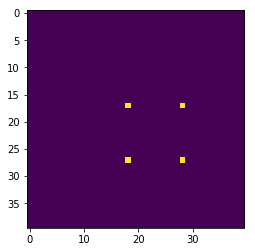

In [68]:
plt.imshow(image[1])

# make cubes around the detected coordinates of a track

In [100]:
trackCoords = np.array([[ 221.4703 ,  277.9795 ,   91.38771],
       [ 220.822  ,  277.8963 ,   90.87967],
       [ 220.4222 ,  277.7063 ,   90.69712],
       [ 220.3429 ,  277.4874 ,   91.01104],
       [ 219.4553 ,  277.9116 ,   91.49389],
       [ 219.0977 ,  278.4957 ,   90.78164],
       [ 218.7131 ,  278.1135 ,   91.17352],
       [ 218.3536 ,  278.8312 ,   91.38822],
       [ 218.5388 ,  277.6865 ,   90.81555],
       [ 217.2589 ,  278.5852 ,   90.58641],
       [ 217.4947 ,  278.8218 ,   91.13576],
       [ 217.6639 ,  278.8476 ,   90.03566],
       [ 218.6794 ,  278.791  ,   90.7134 ],
       [ 216.7301 ,  278.8924 ,   90.13244],
       [ 216.659  ,  278.9118 ,   90.61344],
       [ 216.0836 ,  278.6867 ,   90.43236],
       [ 215.9097 ,  278.6498 ,   90.99632],
       [ 216.7043 ,  278.268  ,   90.96675],
       [ 215.9443 ,  278.4203 ,   90.98492],
       [ 216.3498 ,  278.8052 ,   91.49843],
       [ 216.7664 ,  280.6083 ,   91.35841],
       [ 215.8896 ,  281.4993 ,   91.44501],
       [ 214.6865 ,  282.2683 ,   90.65191],
       [ 215.9946 ,  282.5424 ,   91.03349],
       [ 215.3786 ,  282.5117 ,   90.99929],
       [ 214.7606 ,  282.7682 ,   91.0642 ],
       [ 214.0186 ,  282.5296 ,   90.98131],
       [ 215.9687 ,  282.4692 ,   90.24141],
       [ 214.7293 ,  282.5629 ,   91.01494],
       [ 215.5661 ,  282.494  ,   91.15817],
       [ 215.4329 ,  283.4221 ,   91.00536],
       [ 217.2794 ,  283.5416 ,   91.29775],
       [ 216.7965 ,  283.5243 ,   91.41277],
       [ 217.1147 ,  284.0392 ,   91.63917],
       [ 216.5176 ,  283.2027 ,   92.54282],
       [ 216.4304 ,  282.8854 ,   92.48707],
       [ 216.0332 ,  282.5824 ,   93.0929 ],
       [ 215.5438 ,  283.1368 ,   92.96742],
       [ 215.4624 ,  282.9822 ,   92.64409],
       [ 215.6293 ,  282.7766 ,   92.69283],
       [ 215.0311 ,  281.9069 ,   92.51373],
       [ 214.3911 ,  282.4619 ,   91.71478],
       [ 213.7178 ,  281.9959 ,   91.89774],
       [ 213.6982 ,  281.3669 ,   91.1464 ],
       [ 214.3382 ,  281.8259 ,   91.95675],
       [ 212.4185 ,  281.8204 ,   91.02568],
       [ 212.6238 ,  281.8068 ,   91.74795],
       [ 213.1612 ,  283.46   ,   90.74298],
       [ 213.7857 ,  284.1756 ,   90.64004],
       [ 214.0736 ,  283.1232 ,   91.12304],
       [ 213.6584 ,  283.44   ,   90.72756],
       [ 212.8996 ,  283.4387 ,   89.69412],
       [ 212.6742 ,  284.6351 ,   90.08041],
       [ 211.9561 ,  284.6476 ,   88.88477],
       [ 212.6792 ,  284.0583 ,   89.1079 ],
       [ 212.07   ,  283.9421 ,   89.24052],
       [ 212.2518 ,  284.4191 ,   88.66614],
       [ 211.8461 ,  284.0374 ,   88.28664],
       [ 211.3988 ,  284.0222 ,   88.64306],
       [ 211.3633 ,  283.5286 ,   88.91398],
       [ 211.1901 ,  283.1207 ,   89.19275],
       [ 210.7339 ,  283.3193 ,   88.71169],
       [ 210.9144 ,  284.2091 ,   89.88249],
       [ 211.2933 ,  284.5225 ,   89.69967],
       [ 211.2327 ,  285.0417 ,   90.06551],
       [ 210.3565 ,  285.2871 ,   89.47467],
       [ 210.9917 ,  285.3841 ,   89.06202],
       [ 210.1969 ,  286.1176 ,   88.63071],
       [ 211.4179 ,  286.2297 ,   88.5087 ],
       [ 211.5519 ,  285.7297 ,   87.8305 ]])

In [101]:
centerOfMass = np.array([ 214.98012571,  281.93155857,   90.67524957])

In [103]:
trackCoordsCentered = (trackCoords-trackCoords[0]).astype(int)
#print(trackCoordsCentered)

#at the moment, the cube is at the origin

# these are 560nm coordinates

imageSize = (40, 40, 40) # this is the output from cropping by 20
centerOfImage = np.array([imageSize[0]//2,imageSize[1]//2,imageSize[2]//2])
cubeSize = 5 # this is 5 on each side of the center

#center=np.array([224.29615185,362.37867407,45.60376889])
counter = 0
for coord in trackCoordsCentered[0:10]:

    
    
    
    limits = [-cubeSize,+cubeSize]
    image = np.zeros(imageSize)
    for i in range(0,imageSize[0]):
        for j in  range(0,imageSize[1]):
            for k in range(0,imageSize[2]):
                value = 0
                if i in (limits+centerOfImage[0]+coord[0]) and j in (limits+centerOfImage[1]+coord[1]) and ((k > (limits+centerOfImage[2]+coord[2])[0]) and (k < (limits+centerOfImage[2]+coord[2])[1])) :
    #                print(limits+centerOfImage[0]+coord[0])
    #                print(limits+centerOfImage[1]+coord[1])
                    value = 10
                if j in limits+centerOfImage[1]+coord[1] and k in limits+centerOfImage[2]+coord[2] and ((i > (limits+centerOfImage[0]+coord[0])[0]) and (i < (limits+centerOfImage[0]+coord[0])[1])) :
                    value = 10
                if k in limits+centerOfImage[2]+coord[2] and i in limits+centerOfImage[0]+coord[0] and ((j > (limits+centerOfImage[1]+coord[1])[0]) and (j < (limits+centerOfImage[1]+coord[1])[1])) :
                    value = 10
                #center point
                if i == centerOfImage[0] and j == centerOfImage[1] and k == centerOfImage[2]:
                    value = 10
                image[i,j,k]=value
    
    
    data = image.astype('uint16')
    metadata = dict(microscope='joh', shape=data.shape, dtype=data.dtype.str)
#    print(data.shape, data.dtype, metadata['microscope'])
    metadata = json.dumps(metadata)
#    print(metadata)
    
    skimage.external.tifffile.imsave('./box_by_coord_in_large_image_'+str(counter)+'.tif', data, description=metadata)
    counter = counter +1
    print(counter)

1
2
3
4
5
6
7
8
9
10


In [ ]:
# make a dot only

In [ ]:
#at the moment, the cube is at the origin
imageSize = (40, 40, 40) # this is the output from cropping by 20
cubeSize = 5 # this is 5 on each side of the center
#center=np.array([224.29615185,362.37867407,45.60376889])
coord = np.array([1,5,4]) # this coordinate is given as origin being in the center
centerOfImage = np.array([imageSize[0]//2,imageSize[1]//2,imageSize[2]//2])


limits = [-cubeSize,+cubeSize]
image = np.zeros(imageSize)
for i in range(0,imageSize[0]):
    for j in  range(0,imageSize[1]):
        for k in range(0,imageSize[2]):
            value = 0
            if i in (limits+centerOfImage[0]+coord[0]) and j in (limits+centerOfImage[1]+coord[1]) and ((k > (limits+centerOfImage[2]+coord[2])[0]) and (k < (limits+centerOfImage[2]+coord[2])[1])) :
#                print(limits+centerOfImage[0]+coord[0])
#                print(limits+centerOfImage[1]+coord[1])
                value = 10
            if j in limits+centerOfImage[1]+coord[1] and k in limits+centerOfImage[2]+coord[2] and ((i > (limits+centerOfImage[0]+coord[0])[0]) and (i < (limits+centerOfImage[0]+coord[0])[1])) :
                value = 10
            if k in limits+centerOfImage[2]+coord[2] and i in limits+centerOfImage[0]+coord[0] and ((j > (limits+centerOfImage[1]+coord[1])[0]) and (j < (limits+centerOfImage[1]+coord[1])[1])) :
                value = 10
            image[i,j,k]=value


data = image.astype('uint16')
metadata = dict(microscope='joh', shape=data.shape, dtype=data.dtype.str)
print(data.shape, data.dtype, metadata['microscope'])
metadata = json.dumps(metadata)
print(metadata)

skimage.external.tifffile.imsave('./box_by_coord_in_large_image_3.tif', data, description=metadata)

In [9]:
data = np.random.rand(2, 5, 3, 301, 219)
skimage.external.tifffile.imsave('temp.tif', data, compress=6, metadata={'axes': 'TZCYX'})

In [14]:

data = np.arange(256).reshape((16, 16)).astype('u1')
metadata = dict(microscope='george', shape=data.shape, dtype=data.dtype.str)
print(data.shape, data.dtype, metadata['microscope'])
metadata = json.dumps(metadata)
print(metadata)

skimage.external.tifffile.imsave('microscope.tif', data, description=metadata)

(16, 16) uint8 george
{"microscope": "george", "shape": [16, 16], "dtype": "|u1"}
